In [361]:
# Read data from CSV file
# Divide all data for training and validation sets
import csv

dataset = []
with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
         dataset.append(list(map(int, row)))

train_set = dataset
test_set = dataset[-10:]

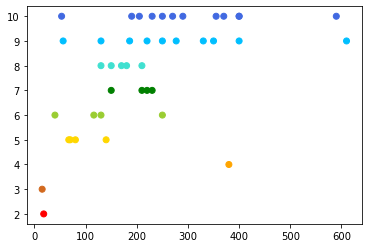

In [362]:
# Draw plot with individual color for each class
import random
import numpy as np
import matplotlib.pyplot as plt

x = list(map(lambda x: x[0], train_set)) # hours
y = list(map(lambda x: x[1], train_set)) # ranks

color_names = ['lightcoral', 'red', 'chocolate', 'orange', 'gold', 'yellowgreen', 'green', 'turquoise', 'deepskyblue', 'royalblue', 'slateblue', 'blueviolet', 'violet', 'deeppink', 'pink']
colors = list(map(lambda y: color_names[y - 1], y))

plt.scatter(x, y, c=colors)
plt.show()

In [363]:
# https://en.wikipedia.org/wiki/Euclidean_distance
from math import sqrt

def distance(p1, p2):
    return sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

In [364]:
from pprint import pprint
def get_neighbors(n, train_set, test_unit):
    distances = []
    
    # Find distance for each train unit
    for train_unit in train_set:
        distances.append([train_unit, distance(train_unit, test_unit)])

    # Then sort by distance
    distances.sort(key=lambda x: x[1])
    return list(map(lambda x: x[0], distances[:n]))

In [365]:
# Predicts class for test set

def predict_class(train_set, test_unit, neighbors_num):
    neighbors = get_neighbors(neighbors_num, train_set, test_unit)
    outs = [x[1] for x in neighbors]
    return max(set(outs), key=outs.count)

In [366]:
# Find number of correct values
# Test validation set for class

def count_total_accuracy(K):
    correct = 0
    exact = 0
    
    for test_unit in test_set:
        pred = predict_class(train_set, test_unit, K)
        if pred == test_unit[1]:
            correct += 1
        else:
            exact += pred - test_unit[1]
        # print('[%3s; %2s] = %2s' % (test_unit[0], test_unit[1], pred))

    print('Total accuracy: {:.2%}, K = {}'.format(correct / len(validation_set), K))
    return correct / len(validation_set)

Total accuracy: 87.50%, K = 2
Total accuracy: 100.00%, K = 3
Total accuracy: 87.50%, K = 4
Total accuracy: 62.50%, K = 5
Total accuracy: 75.00%, K = 6
Total accuracy: 87.50%, K = 7
Total accuracy: 62.50%, K = 8
Accuracy: [1.0, 3]


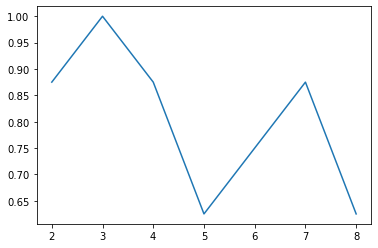

In [367]:
# Try different K to get best results

K = range(2, 9)
res = []
for k in K:
    res.append([count_total_accuracy(k), k])

print('Accuracy: {}'.format(max(res)))

plt.plot(list(map(lambda x: x[1], res)), list(map(lambda x: x[0], res)))
plt.show()

#### Про проект
Одною з найпопулярніших ігор сьогодні в світі є Counter-Strike: Global Offensive. Звання – це внутрішньоігровий показник навиків гравця. І часто буває, що граючи черговий рейтинговий матч, досить цікаво дізнатися звання своїх тімметів чи гравців з іншої команди. Але система гри не дозволяє переглянути звання гравця до самого завершення матчу. Єдине, як ми змогли б переглянути звання гравця - це проаналізувати кількість зіграних ним годин в грі. Саме тому, я вирішив обрати цю тему для проекту в цілях практичного використання.

Отже, в звязку з дозволом малої кількості тренінгових даних, результати класифікації можуть бути неточними і менш наближеними до релаьності. Тому, для менш затратного облічення, в проекті розглядатимемо тільки перших 10 рангів. Всі тренінгові і тестові дані були взяті з Steam форуму (від реальних гравців).

Для даної задачі я обрав алгоритм K-NN(K найближчих сусідів). Він не параметричний (а отже незалежний від даних тренінгових), легкий в реалізації для багатокласової класифікації, має тільки один гіпер параметр. Проте, основним мінусом залишається його повільність обчислень, але на наш проект це ніяк не вплине (у нас мало векторів даних).

#### Пошук відстані між сусідами

Для пошуку відстані між сусідами я вирішив обрати формулу [Еукліда](https://en.wikipedia.org/wiki/Euclidean_distance).
![dsd](https://miro.medium.com/max/638/1*EUUQDZQktwUPkdCZaFicSQ.png)

#### Реалізація

 1. Для кожного тестового юніту шукаємо К найближчих сусідів. 
 2. З цих К сусідів, шукаємо кількість яких найбільша, вибираємо.
 3. Для кожного тестового юніту рахуємо загальну помилку.
 
#### Вибір моделі

Вибір моделі полягає в тому, щоб знайти оптимальне значення гіпер параметру К.